In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

In [2]:
folder_path = 'new_dataset/results' 
file_pattern = os.path.join(folder_path, '*.csv')

csv_files = glob.glob(file_pattern)

print("CSV files found:", csv_files)

CSV files found: ['new_dataset/results/8n_ADAMW.csv', 'new_dataset/results/10m_ADAMW.csv', 'new_dataset/results/9c_SGD.csv', 'new_dataset/results/10s_ADAMW.csv', 'new_dataset/results/9s_ADAMW.csv', 'new_dataset/results/9m_ADAMW.csv', 'new_dataset/results/8m_SGD.csv', 'new_dataset/results/9m_SGD.csv', 'new_dataset/results/10m_SGD.csv', 'new_dataset/results/9c_ADAMW.csv', 'new_dataset/results/10n_ADAMW.csv', 'new_dataset/results/8m_ADAMW.csv', 'new_dataset/results/10s_SGD.csv', 'new_dataset/results/9s_SGD.csv', 'new_dataset/results/8s_SGD.csv', 'new_dataset/results/10n_SGD.csv', 'new_dataset/results/8n_SGD.csv', 'new_dataset/results/8s_ADAMW.csv']


In [3]:
params_dict = {
    'v10n': 2.3, 'v10s': 7.2, 'v10m': 15.4,
    'v9s': 7.2, 'v9m': 20.1, 'v9c': 25.5,
    'v8n': 3.2, 'v8s': 11.2, 'v8m': 25.9
}

if not csv_files:
    print("No CSV files found in the specified directory.")
else:
    df_list = []
    for file in csv_files:
        file_name = os.path.basename(file).split('.')[0]
        model_version,optimizer  = file_name.split('_')
        model, version = model_version[:-1], model_version[-1]
        df = pd.read_csv(file)
        df['optimizer'] = optimizer
        df['model'] = "v" + model
        df['version'] = version
        df_list.append(df)

    combined_data = pd.concat(df_list, ignore_index=True)
    combined_data.columns = combined_data.columns.str.strip()
    combined_data['model_version_optimizer'] =combined_data['model'] + '-' + combined_data['version']+ '_' + combined_data['optimizer'] 

    combined_data['params'] = combined_data.apply(lambda row: params_dict.get(f"{row['model']}{row['version']}", None), axis=1)

    print("Columns in the combined DataFrame:", combined_data.columns)
    print(combined_data.head())

Columns in the combined DataFrame: Index(['epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2', 'optimizer', 'model', 'version',
       'model_version_optimizer', 'params'],
      dtype='object')
   epoch  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1          3.3392          4.0532          3.8579   
1      2          2.6895          3.0740          3.0457   
2      3          2.4297          2.6869          2.7338   
3      4          2.2647          2.4255          2.5187   
4      5          2.1546          2.3057          2.4091   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.02157            0.16273           0.00872   
1               0.12627            0.20167           0.08294   
2               0.18538            0.25869           0.

In [4]:
combined_data.columns

Index(['epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2', 'optimizer', 'model', 'version',
       'model_version_optimizer', 'params'],
      dtype='object')

   params model version  metrics/mAP50(B)
0     2.3   v10       n           0.82255
1     3.2    v8       n           0.83050
2     7.2   v10       s           0.86437
3     7.2    v9       s           0.83646
4    11.2    v8       s           0.85000
5    15.4   v10       m           0.86119
6    20.1    v9       m           0.84368
7    25.5    v9       c           0.85646
8    25.9    v8       m           0.84768


/var/folders/rz/77p23rr93yl03gqs0099s2r40000gn/T/ipykernel_89040/2333948003.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(data=data_max, x='params', y='metrics/mAP50(B)', hue='model',style='model', marker='o', ci=None,palette=palette)


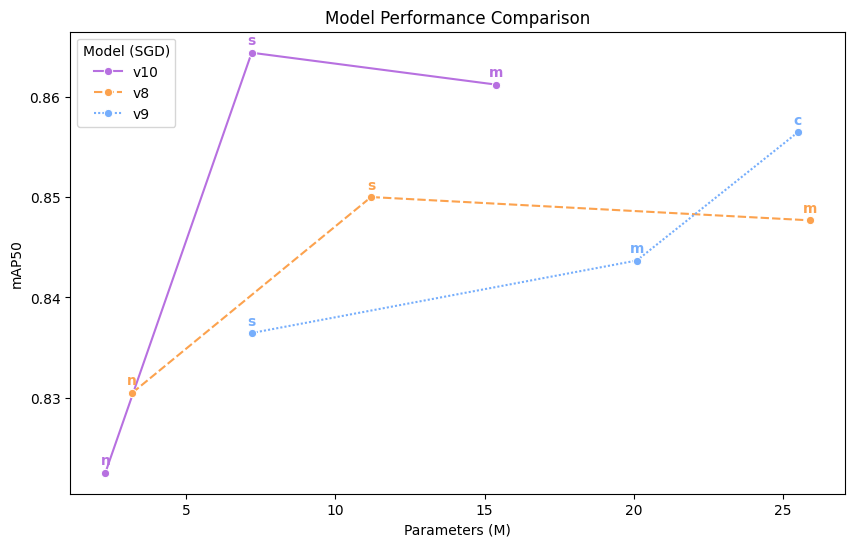

In [5]:
# params vs mAP
selected_optimizer="SGD"
palette = ['#b770e0', '#fca24e', '#76aefc']
data_max = combined_data[combined_data['optimizer'] == selected_optimizer].groupby(['params', 'model', 'version'], as_index=False)['metrics/mAP50(B)'].max()
print(data_max)

plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=data_max, x='params', y='metrics/mAP50(B)', hue='model',style='model', marker='o', ci=None,palette=palette)

line_colors = {line.get_label(): line.get_color() for line in ax.get_lines()}

for _, row in data_max.iterrows():
    color = line_colors[row['model']]
    plt.text(row['params'], row['metrics/mAP50(B)'] + 0.0008, 
             row['version'], 
             horizontalalignment='center', size='medium', color=color, weight='semibold')

plt.xlabel('Parameters (M)')
plt.ylabel('mAP50')
plt.title('Model Performance Comparison')
plt.legend(title='Model (SGD)',loc='upper left')

plt.show()

/var/folders/rz/77p23rr93yl03gqs0099s2r40000gn/T/ipykernel_89040/1910667212.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_melted, x='model', y='Value', hue='Metric', ci=None,palette = ['#b770e0', '#fca24e'])


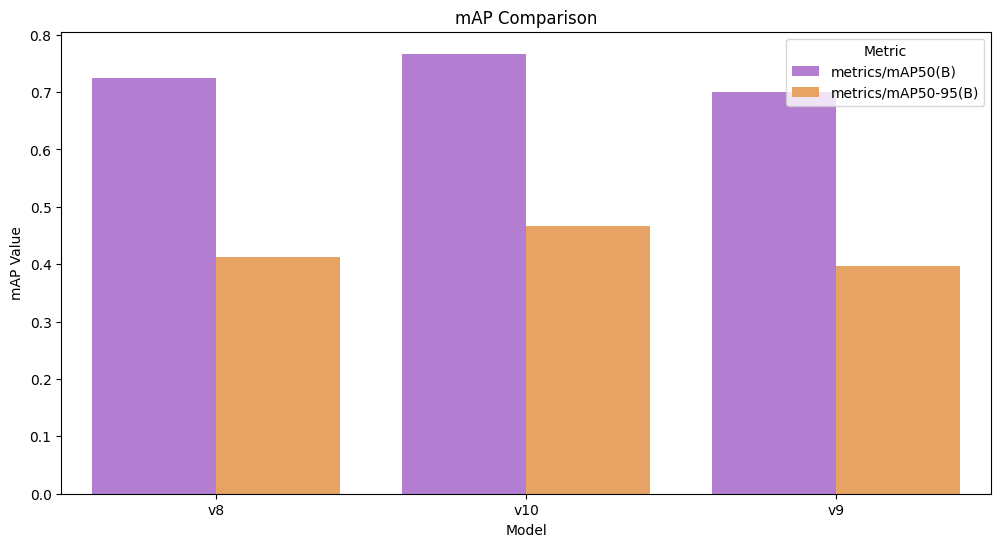

In [6]:
# Grouped Bar Chart for mAP
plt.figure(figsize=(12, 6))
data_melted = combined_data.melt(id_vars=['model', 'version', 'optimizer'], value_vars=['metrics/mAP50(B)', 'metrics/mAP50-95(B)'], 
                                var_name='Metric', value_name='Value')
sns.barplot(data=data_melted, x='model', y='Value', hue='Metric', ci=None,palette = ['#b770e0', '#fca24e'])
plt.title('mAP Comparison')
plt.xlabel('Model')
plt.ylabel('mAP Value')
plt.legend(title='Metric')
plt.show()

/var/folders/rz/77p23rr93yl03gqs0099s2r40000gn/T/ipykernel_89040/3631217680.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.barplot(


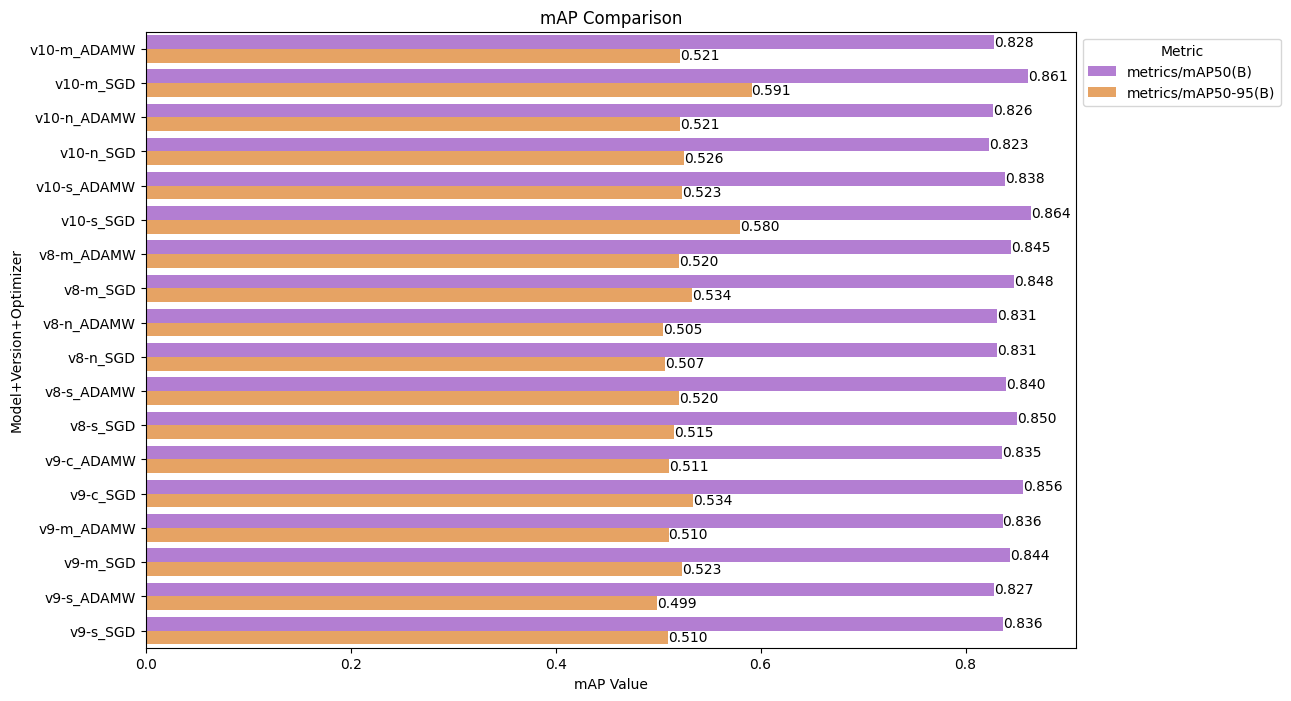

In [7]:
#Bar Chart for mAP
data_melted = combined_data.melt(
    id_vars=['model_version_optimizer'],
    value_vars=['metrics/mAP50(B)', 'metrics/mAP50-95(B)'],
    var_name='Metric', value_name='Value'
)

data_max = data_melted.groupby(['model_version_optimizer', 'Metric'], as_index=False).max()
data_max_sorted = data_max.sort_values(by='model_version_optimizer')

plt.figure(figsize=(12, 8))
ax=sns.barplot(
    data=data_max_sorted, 
    y='model_version_optimizer', 
    x='Value', 
    hue='Metric', 
    ci=None, 
    orient='h',
    palette = ['#b770e0', '#fca24e']
)
plt.title('mAP Comparison')
plt.ylabel('Model+Version+Optimizer')
plt.xlabel('mAP Value')
# plt.legend(title='Metric')
plt.legend(title='Metric', bbox_to_anchor=(1, 1), loc='upper left')
for p in ax.containers:
    ax.bar_label(p, fmt='%.3f', label_type='edge')
plt.show()

/var/folders/rz/77p23rr93yl03gqs0099s2r40000gn/T/ipykernel_89040/1022445416.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.barplot(


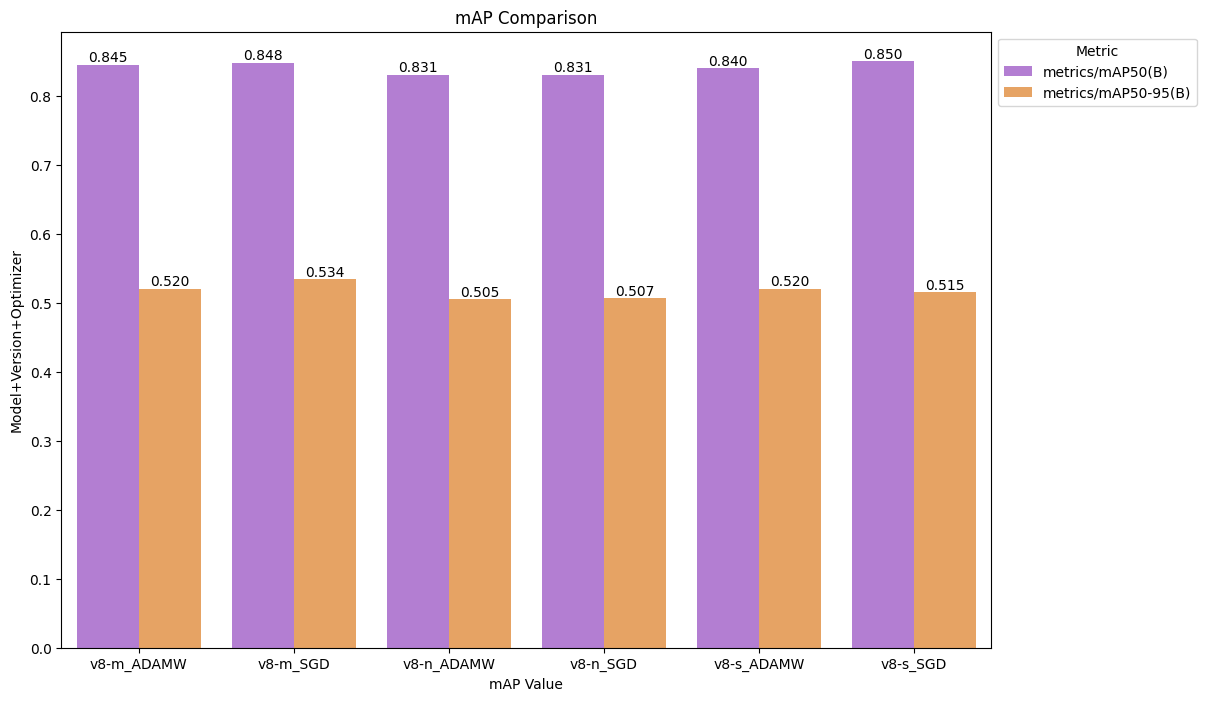

In [39]:
#Bar Chart for model mAP
_data = combined_data[combined_data['model'] == 'v8']
data_melted = _data.melt(
    id_vars=['model_version_optimizer'],
    value_vars=['metrics/mAP50(B)', 'metrics/mAP50-95(B)'],
    var_name='Metric', value_name='Value'
)

data_max = data_melted.groupby(['model_version_optimizer', 'Metric'], as_index=False).max()
data_max_sorted = data_max.sort_values(by='model_version_optimizer')

plt.figure(figsize=(12, 8))
ax=sns.barplot(
    data=data_max_sorted, 
    y='Value', 
    x='model_version_optimizer', 
    hue='Metric', 
    ci=None, 
    # orient='h',
    palette = ['#b770e0', '#fca24e']
)
plt.title('mAP Comparison')
plt.ylabel('Model+Version+Optimizer')
plt.xlabel('mAP Value')
# plt.legend(title='Metric')
plt.legend(title='Metric', bbox_to_anchor=(1, 1), loc='upper left')
for p in ax.containers:
    ax.bar_label(p, fmt='%.3f', label_type='edge')
plt.show()

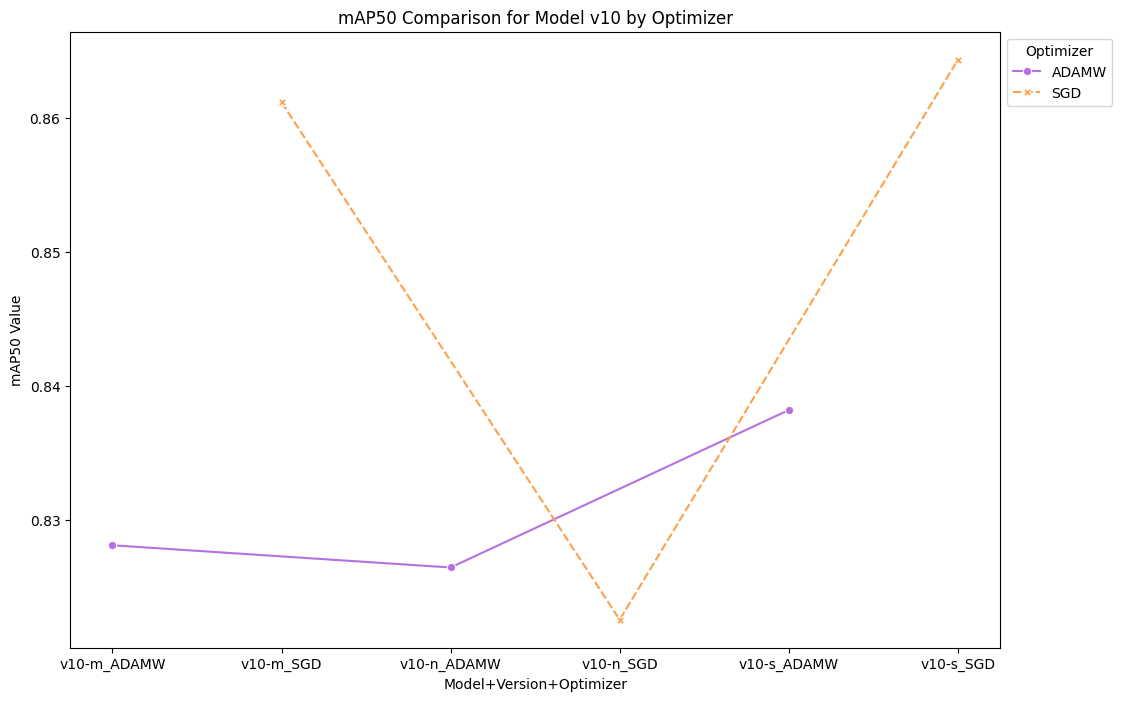

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data where optimizer is 'adamw'
_data = combined_data[combined_data['model'] == 'v10']

# Melting the data as before
data_melted = _data.melt(
    id_vars=['model_version_optimizer', 'optimizer'],
    value_vars=['metrics/mAP50(B)'],
    var_name='Metric', value_name='Value',
)

# Grouping and sorting
data_max = data_melted.groupby(['model_version_optimizer', 'Metric'], as_index=False).max()
data_max_sorted = data_max.sort_values(by='model_version_optimizer')
data_max_sorted

# Plotting
plt.figure(figsize=(12, 8))

# Using different markers for each 'Metric' in the lineplot
ax = sns.lineplot(
    data=data_max_sorted, 
    x='model_version_optimizer',  # 'model_version_optimizer' on the x-axis
    y='Value',                    # 'Value' (mAP50) on the y-axis
    hue='optimizer',               # Differentiating by 'optimizer'
    style='optimizer',             # Using different styles for each optimizer
    markers=True,                  # Showing markers for the points
    palette = ['#b770e0', '#fca24e'],
    
)

plt.title('mAP50 Comparison for Model v10 by Optimizer')
plt.xlabel('Model+Version+Optimizer')  # X-axis label
plt.ylabel('mAP50 Value')              # Y-axis label
plt.legend(title='Optimizer', bbox_to_anchor=(1, 1), loc='upper left')

# Display the plot
plt.show()


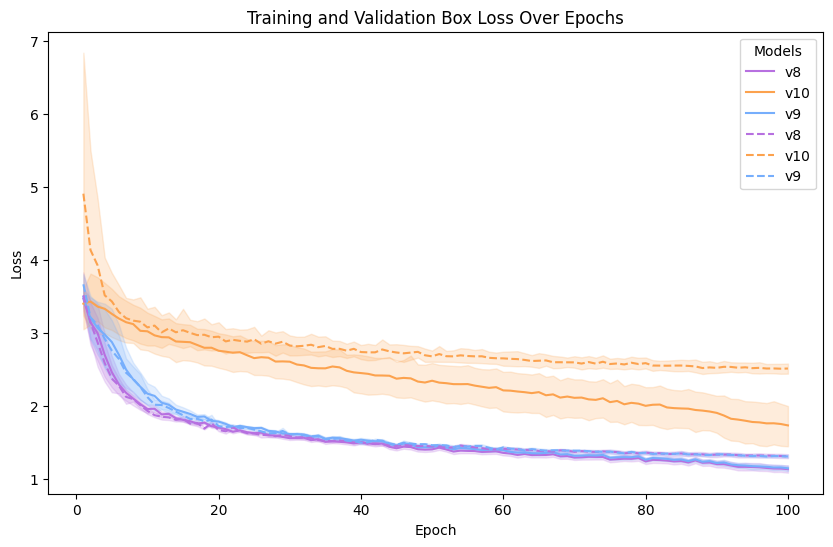

In [133]:
#Loss comparision based on model
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_data, x='epoch', y='train/box_loss', hue='model',palette=palette)
sns.lineplot(data=combined_data, x='epoch', y='val/box_loss', hue='model', linestyle='--',palette=palette)
plt.title('Training and Validation Box Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(title='Models')
plt.show()

/var/folders/rz/77p23rr93yl03gqs0099s2r40000gn/T/ipykernel_55192/3913249736.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(data=combined_data, x='epoch', y='train/box_loss', hue='optimizer',palette=palette)
/var/folders/rz/77p23rr93yl03gqs0099s2r40000gn/T/ipykernel_55192/3913249736.py:4: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(data=combined_data, x='epoch', y='val/box_loss', hue='optimizer', linestyle='--',palette=palette)


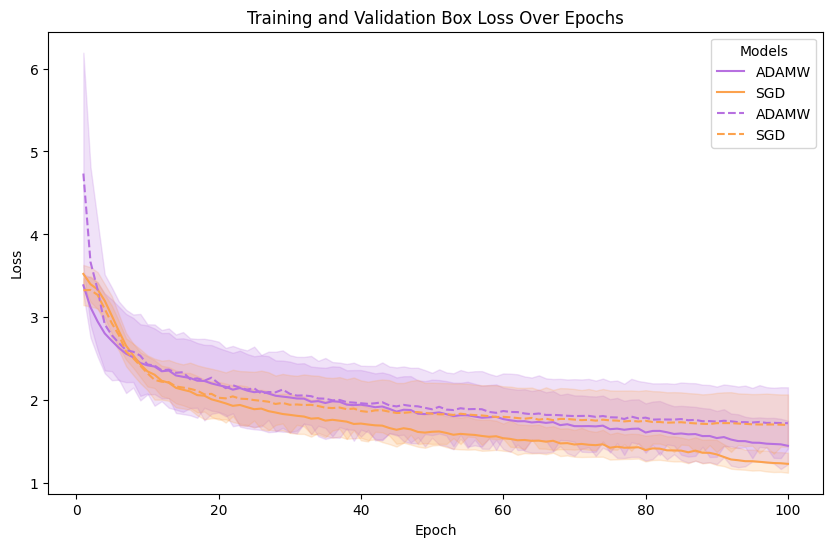

In [134]:
#Loss comparision based on optimizer
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_data, x='epoch', y='train/box_loss', hue='optimizer',palette=palette)
sns.lineplot(data=combined_data, x='epoch', y='val/box_loss', hue='optimizer', linestyle='--',palette=palette)
plt.title('Training and Validation Box Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(title='Models')
plt.show()

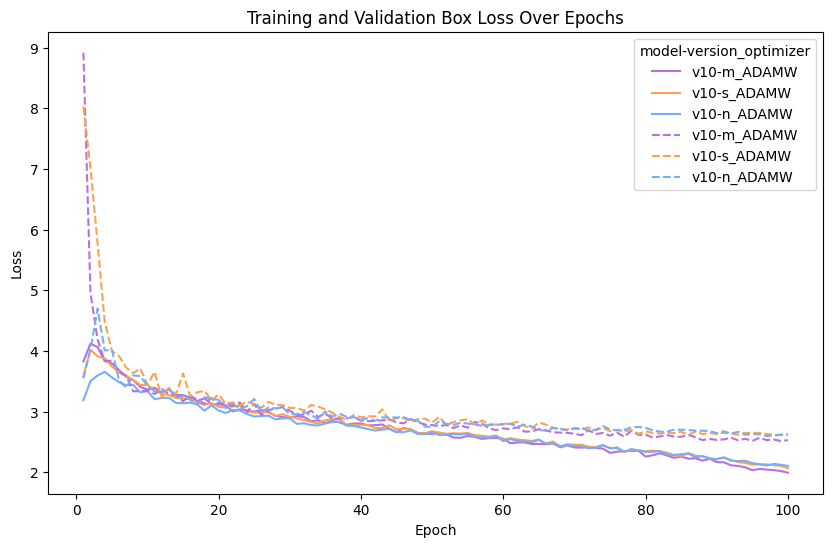

In [129]:
#Loss Curve (Optimizer wise)
data_max = combined_data[(combined_data['model'] == "v10") & (combined_data['optimizer'] == "ADAMW")]
data_max
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_max, x='epoch', y='train/box_loss', hue='model_version_optimizer',palette=palette)
sns.lineplot(data=data_max, x='epoch', y='val/box_loss', hue='model_version_optimizer', linestyle='--',palette=palette)
plt.title('Training and Validation Box Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(title='model-version_optimizer')
plt.show()

# # For all Loss Curves
# plt.figure(figsize=(10, 6))
# sns.lineplot(data=combined_data, x='epoch', y='train/box_loss', hue='model_version_optimizer')
# sns.lineplot(data=combined_data, x='epoch', y='val/box_loss', hue='model_version_optimizer', linestyle='--')
# plt.title('Training and Validation Box Loss Over Epochs')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend(title='Models')
# plt.show()

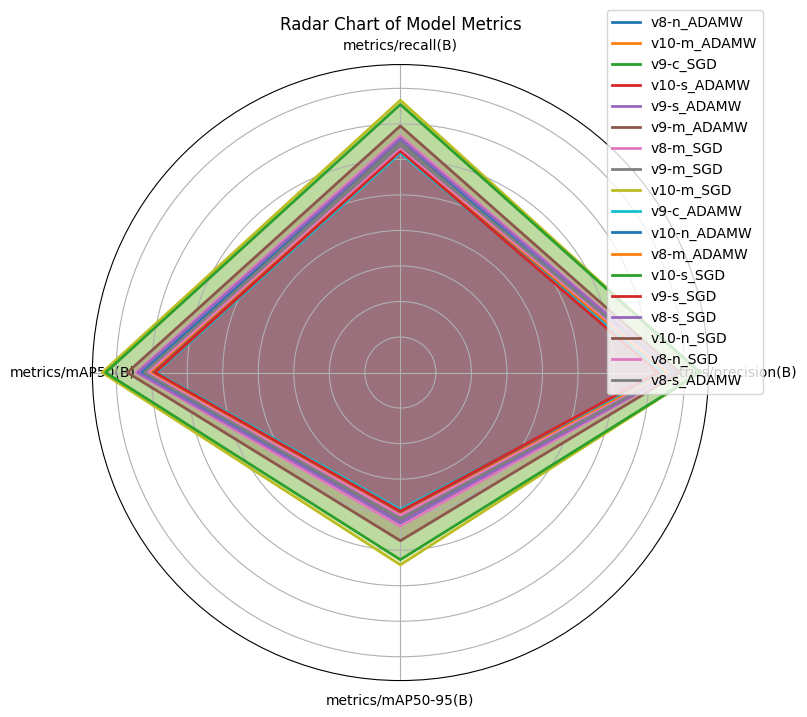

In [9]:
# Radar Chart for Multiple Metrics
metrics = ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
labels = combined_data['model_version_optimizer'].unique()
values = [combined_data[combined_data['model_version_optimizer'] == label][metrics].mean().values for label in labels]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
angles = np.linspace(0, 2 * pi, len(metrics), endpoint=False).tolist()
values = np.array(values)
values = np.concatenate((values, values[:, [0]]), axis=1)
angles += angles[:1]

for i, (label, value) in enumerate(zip(labels, values)):
    ax.plot(angles, value, linewidth=2, label=label)
    ax.fill(angles, value, alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.title('Radar Chart of Model Metrics')
plt.show()

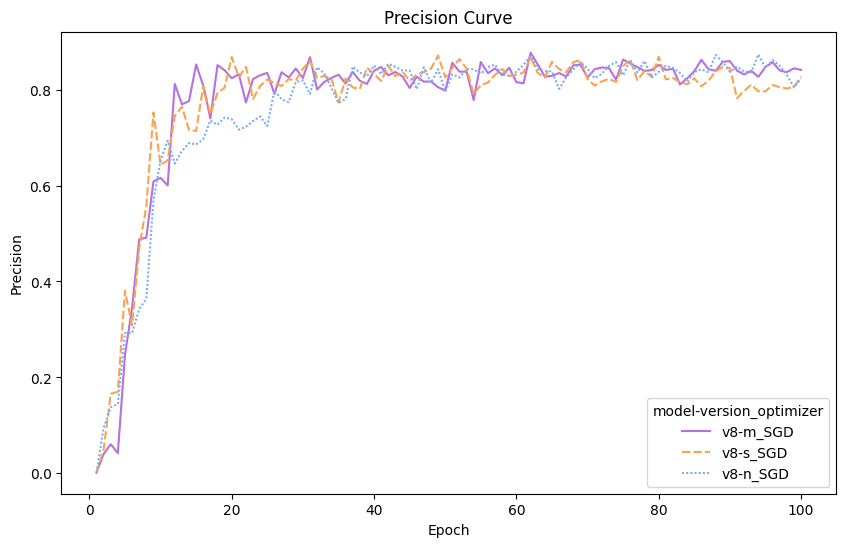

In [115]:
#Precision-Recall Curve (Optimizer wise)
data_max = combined_data[(combined_data['model'] == "v8") & (combined_data['optimizer'] == "SGD")]
data_max
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_max, x='epoch', y='metrics/precision(B)', hue='model_version_optimizer',style='model_version_optimizer',palette=palette)
plt.title('Precision Curve')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend(title='model-version_optimizer',loc='lower right', bbox_to_anchor=(1, 0))
plt.show()

# # For all Precision-Recall Curve
# plt.figure(figsize=(10, 6))
# sns.lineplot(data=combined_data, x='epoch', y='metrics/precision(B)', hue='model_version_optimizer')
# plt.title('Precision Curve')
# plt.xlabel('Epoch')
# plt.ylabel('Precision')
# plt.legend(title='Models')
# plt.show()






/var/folders/rz/77p23rr93yl03gqs0099s2r40000gn/T/ipykernel_55192/4030249346.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(data=combined_data, x='epoch', y='metrics/mAP50(B)', hue='optimizer',palette=palette)


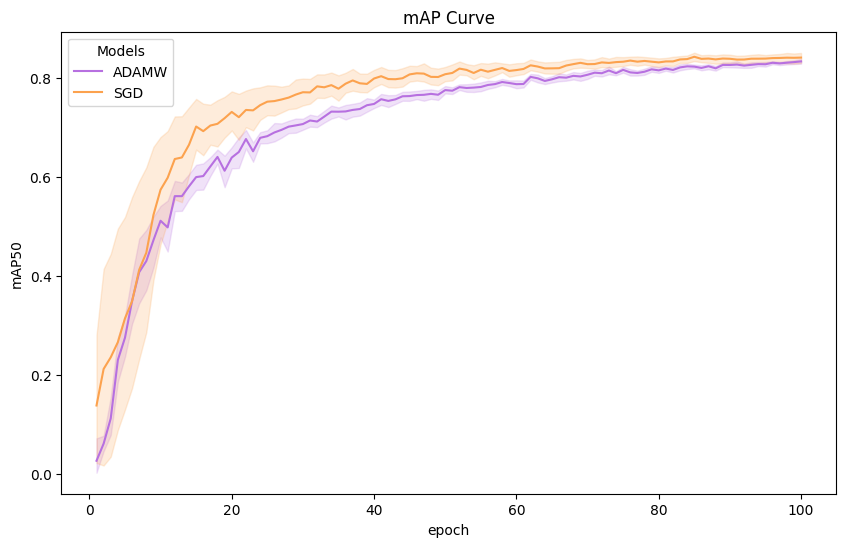

In [36]:
#mAP Comparision based on Optimizer
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_data, x='epoch', y='metrics/mAP50(B)', hue='optimizer',palette=palette)
plt.title('mAP Curve')
plt.xlabel('epoch')
plt.ylabel('mAP50')
plt.legend(title='Models')
plt.show()

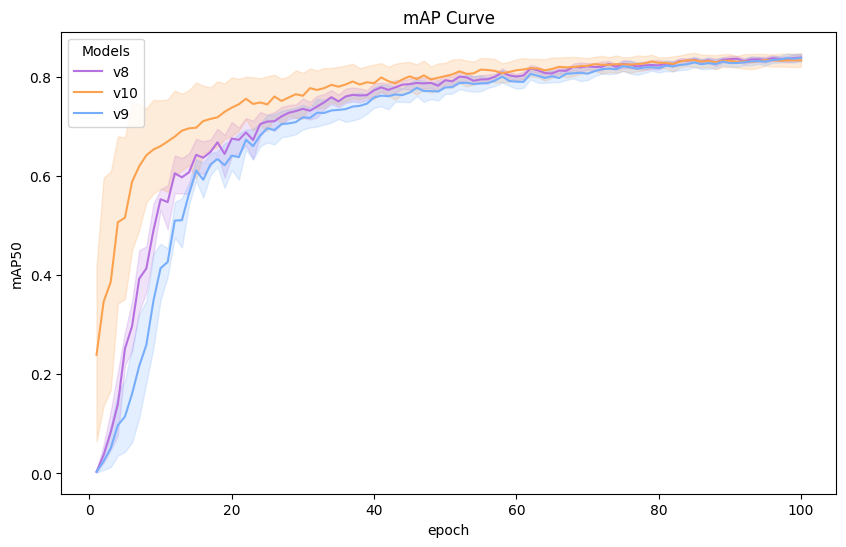

In [40]:
#mAP Comparision based on Model
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_data, x='epoch', y='metrics/mAP50(B)', hue='model',palette=palette)
plt.title('mAP Curve')
plt.xlabel('epoch')
plt.ylabel('mAP50')
plt.legend(title='Models')
plt.show()

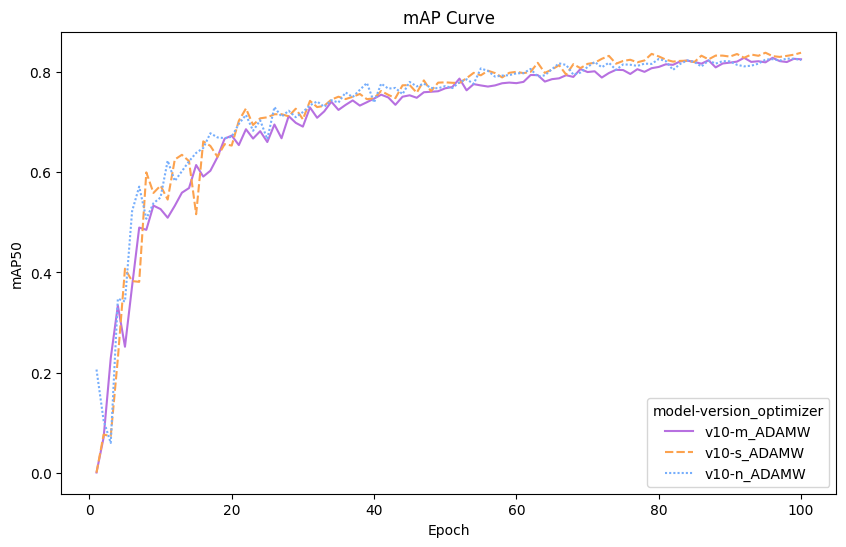

In [85]:
#mAP Comparision based on Epochs (Optimizer wise)
data_max = combined_data[(combined_data['model'] == "v10") & (combined_data['optimizer'] == "ADAMW")]
# data_max
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_max, x='epoch', y='metrics/mAP50(B)',hue='model_version_optimizer',style='model_version_optimizer',palette=palette)
plt.title('mAP Curve')
plt.xlabel('Epoch')
plt.ylabel('mAP50')
plt.legend(title='model-version_optimizer',loc='lower right', bbox_to_anchor=(1, 0))
plt.show()

# #For All mAP Curve
# plt.figure(figsize=(10, 6))
# sns.lineplot(data=combined_data, x='epoch', y='metrics/mAP50(B)',hue='model_version_optimizer',palette=palette)
# plt.title('mAP Curve')
# plt.xlabel('Epoch')
# plt.ylabel('mAP50')
# plt.legend(title='model-version_optimizer',loc='lower right', bbox_to_anchor=(1, 0))
# plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


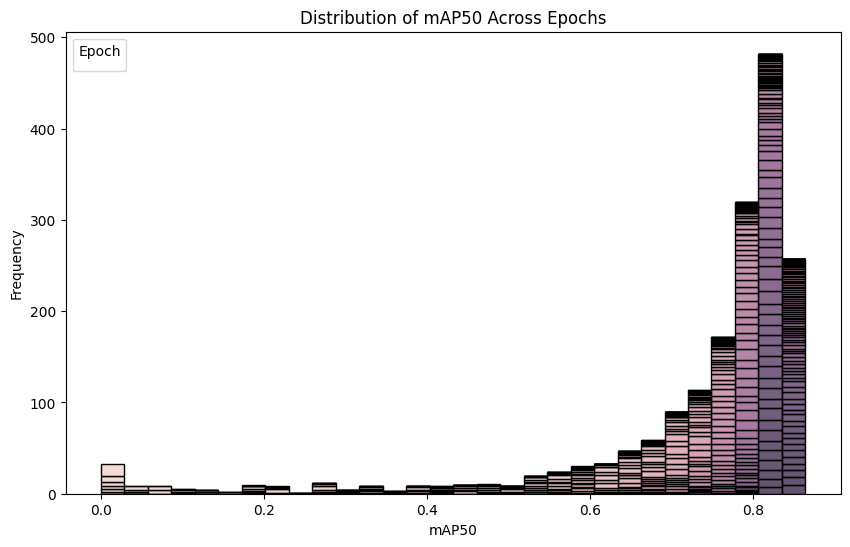

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for a specific epoch or use `hue` to include all epochs
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_data, x='metrics/mAP50(B)', hue='epoch', multiple='stack', bins=30)
plt.title('Distribution of mAP50 Across Epochs')
plt.xlabel('mAP50')
plt.ylabel('Frequency')
plt.legend(title='Epoch')
plt.show()


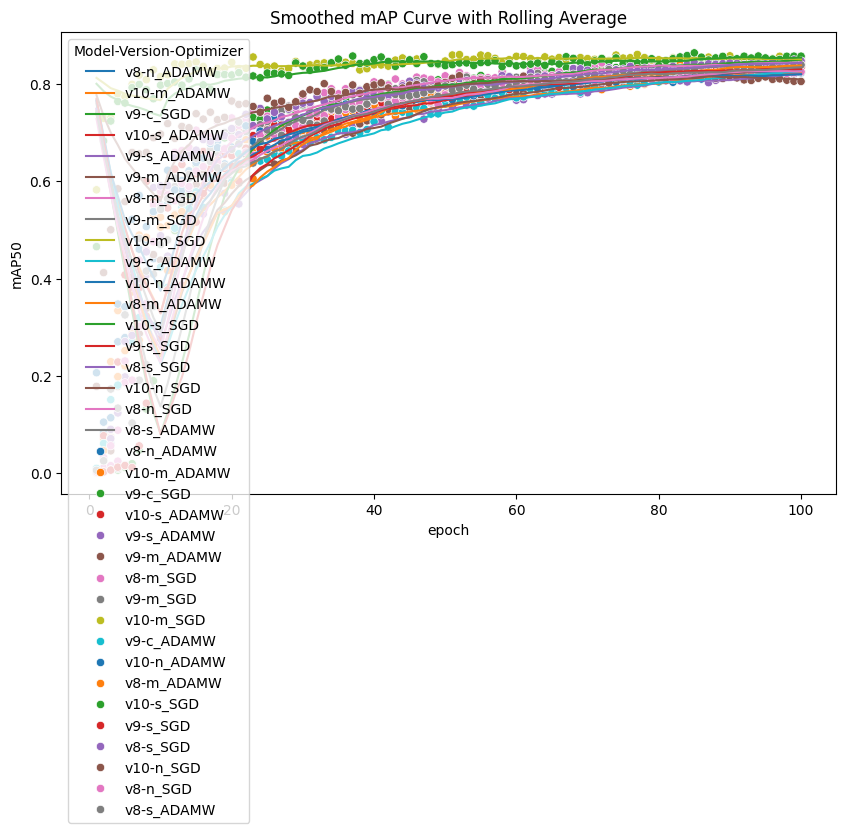

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate rolling average
window_size = 10  # Adjust the window size as needed
combined_data['rolling_mAP50'] = combined_data['metrics/mAP50(B)'].rolling(window=window_size).mean()

plt.figure(figsize=(10, 6))

# Plot smooth line using rolling average
sns.lineplot(
    data=combined_data, 
    x='epoch', 
    y='rolling_mAP50', 
    hue='model_version_optimizer',
    linestyle='-', 
    palette='tab10'
)

# Optionally, plot original data points with spikes
sns.scatterplot(
    data=combined_data, 
    x='epoch', 
    y='metrics/mAP50(B)', 
    hue='model_version_optimizer',
    marker='o', 
    palette='tab10'
)

plt.title('Smoothed mAP Curve with Rolling Average')
plt.xlabel('epoch')
plt.ylabel('mAP50')
plt.legend(title='Model-Version-Optimizer')
plt.show()
